### Import packages


In [1]:
from pathlib import Path
import logging

import pandas as pd
import numpy as np
from scipy.optimize import fsolve
from numpy.random import rand,choice
import matplotlib.pyplot as plt

from Calculator import *
from FindPointBy3P3A import optimized_eqs
from Draw import circle,plot_line

### Const set


In [2]:
PATH_FIGURE_ROOT = Path("../figure")
ZERO = 1e-8

### Data reference


In [ ]:


planes = ["FY00","FY01","FY02","FY03","FY04","FY05","FY06","FY07","FY08","FY09"]

radius = 100
arches = 0

divide_arch = 2*40*np.pi/360

cxs = [radius*np.cos(alpha) for alpha in np.arange(0,2*np.pi+0.1,0.1)]
cys = [radius*np.sin(alpha) for alpha in np.arange(0,2*np.pi+0.1,0.1)]

plane_series_tag = [1,2,3,4,5,6,7,8,9]

plane_series = np.array([(np.float64(0),np.float64(0)),*[(radius,x) for x in np.arange(0,2*np.pi,40*2*np.pi/360)]])
plane_series_xy = [r2xy(*p)for p in plane_series]
plane_positions_truth = [(0,0),(100,0),*[(i[0]+rand()-0.5,i[1]+rand()-0.5) for i in plane_series_xy[3:]]]

plane_main_tag = [0,*[tag.item() for tag in choice(plane_series_tag,size=2,replace=False)]]

plane_main_tag.sort()

plane_main = [plane_series[plane_tag] for plane_tag in plane_main_tag]

plane_1 = plane_series[9] + [5*rand(),5*rand()]

plane_series

plane_main_xy = [r2xy(*p) for p in plane_main]


### Calculate


$$P \times M + D = P' $$

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\times
\begin{bmatrix}
\cos{\theta} & \sin{\theta} \\
-\sin{\theta} & \cos{\theta}
\end{bmatrix}
+
\begin{bmatrix}
x_{diff} \\
y_{diff}
\end{bmatrix}
=
\begin{bmatrix}
x'\\
y'
\end{bmatrix}
$$


In [4]:
def equation_1(phi,alpha,beta,theta):
    return np.sin(alpha)*np.sin(np.pi-phi-beta)-np.sin(beta)*np.sin(np.pi-alpha-theta+phi)

In [5]:
def equtions_solve_d1_d2_d3(vars,alpha1,alpha2,alpha3,d01,d02,d03):
    def eq(vars):
        d1,d2,d3 = vars
        result1 = np.cos(alpha1) - (d1**2+d3**2 - d01**2)/(2*d1*d3)
        result2 = np.cos(alpha2) - (d2**2+d3**2 - d02**2)/(2*d2*d3)
        result3 = np.cos(alpha3) - (d1**2+d2**2 - d03**2)/(2*d1*d1)
        return [result1,result2,result3]
    return fsolve(eq,[1,1,1])

<!-- 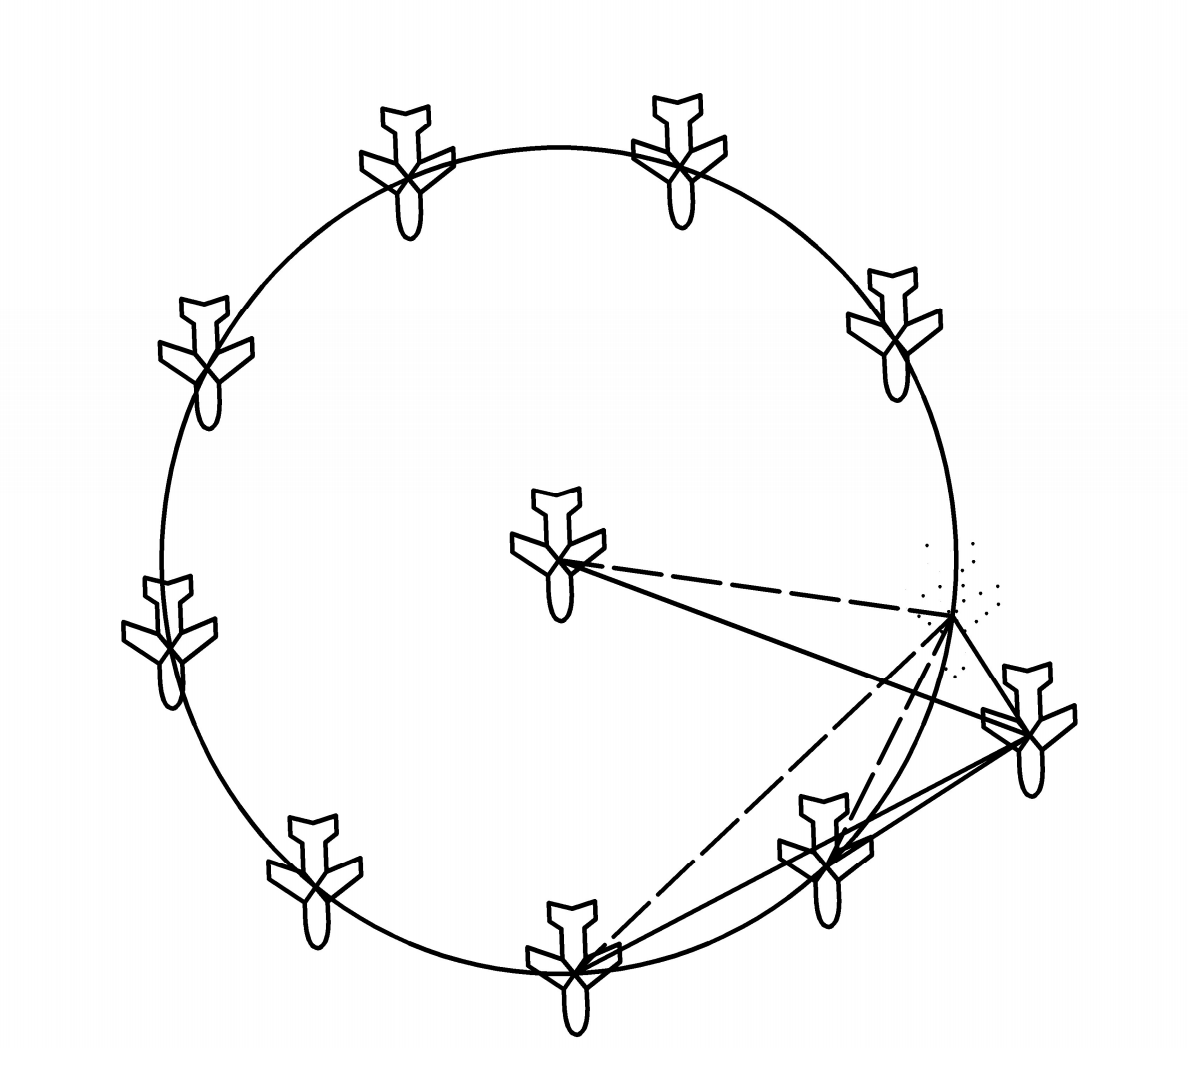 -->


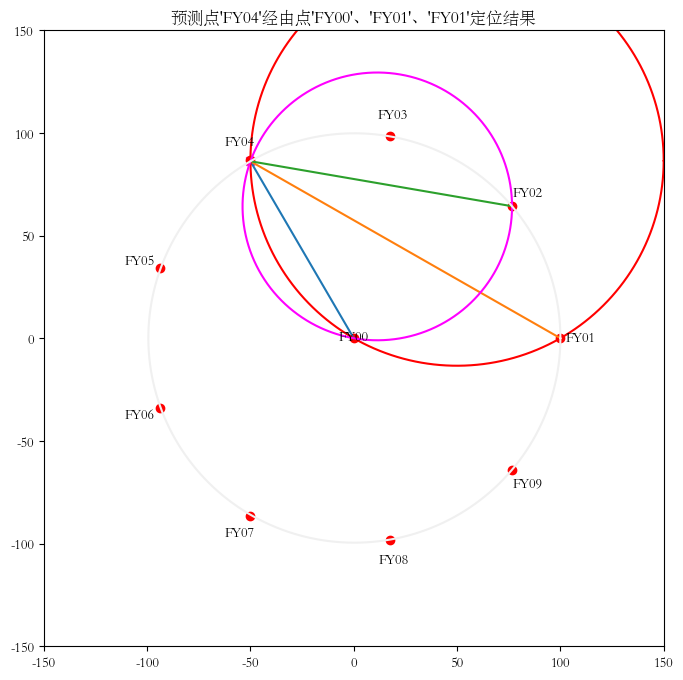

In [10]:
pre_p = plane_positions_truth[1]


plt.figure(figsize=(8,8))
for i, (x, y) in enumerate(plane_series_xy[:10]):
    if i != 0:
        plt.plot(x, y, "ro")  # 蓝色圆点
        plt.text(
            x * 1.1, y * 1.1, planes[i], fontsize=10, ha="center", va="center"
        )  # 标签略外移
    else:
        plt.plot(x, y, "ro")  # 蓝色圆点
        plt.text(
            x, y + 0.5, planes[i], fontsize=10, ha="center", va="center"
        )  # 标签略外移



plt.scatter(pre_p[0],pre_p[1],color="#F00FBB",marker="x")

plot_line(pre_p,plane_main_xy)

alphas = location(plane_main_xy,pre_p)
c1,r1 = get_center(plane_main_xy[0],plane_main_xy[1],alphas[0],pre_p)
c2,r2 = get_center(plane_main_xy[0],plane_main_xy[2],alphas[1],pre_p)
c3,r3 = get_center(plane_main_xy[1],plane_main_xy[2],alphas[2],pre_p)

circle(c1,r1,"#FF0000")
circle(c2,r2,"#FF00FF")
circle(c3,r3,"#F0F0F0")


plt.xlim([-150,150])
plt.ylim([-150,150])
plt.title("预测点'FY04'经由点'FY00'、'FY01'、'FY01'定位结果")
plt.show()

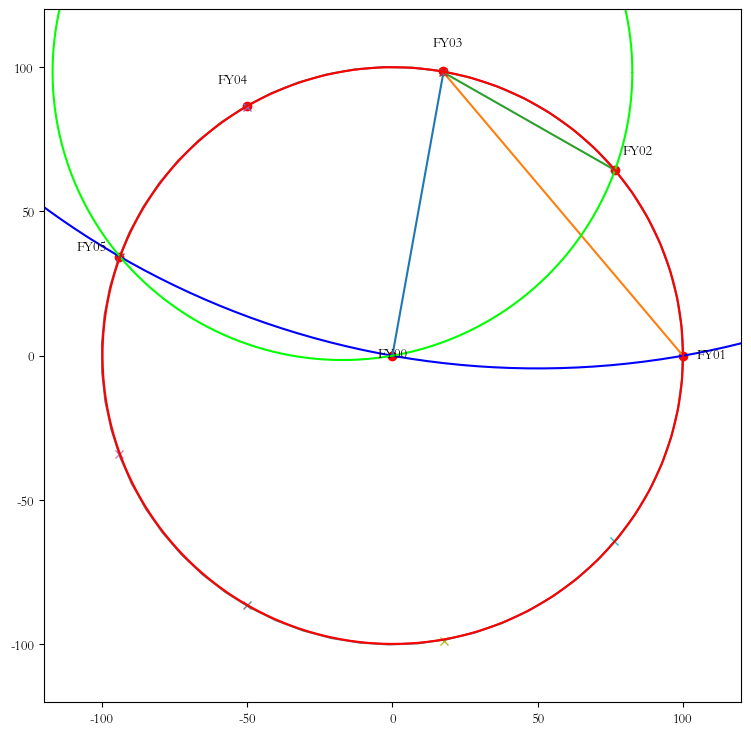

In [29]:
plt.figure(figsize=(9,9))
for i, (x, y) in enumerate(plane_series_xy[:6]):
    if i != 0:
        plt.plot(x, y, "ro")  # 蓝色圆点
        plt.text(
            x * 1.1, y * 1.1, planes[i], fontsize=10, ha="center", va="center"
        )  # 标签略外移
    else:
        plt.plot(x, y, "ro")  # 蓝色圆点
        plt.text(
            x, y + 0.5, planes[i], fontsize=10, ha="center", va="center"
        )  # 标签略外移
        
plot_line(plane_positions_truth[0],plane_series_xy[:3])



for i, (x, y) in enumerate(plane_positions_truth):
    plt.plot(x,y,"x")
plt.xlim([-120,120])
plt.ylim([-120,120])
plt.plot(cxs, cys, color="#666666")

ls = location(plane_series_xy[0:3],plane_positions_truth[2])

c1,r1 = get_center(plane_series_xy[0],plane_series_xy[1],ls[0],plane_positions_truth[2])
c2,r2 = get_center(plane_series_xy[0],plane_series_xy[2],ls[1],plane_positions_truth[2])
c3,r3 = get_center(plane_series_xy[1],plane_series_xy[2],ls[2],plane_positions_truth[2])



circle(c1,r1,color="#0000FF")
circle(c2,r2,color="#00FF00")
circle(c3,r3,color="#FF0000")

plt.show()

In [14]:
ps = [
    (0,0),
    (100,0),
    (98,40.10),
    (112,80.21),
    (105,119.75),
    (98,159.86),
    (112,199.96),
    (105,240.07),
    (98,280.17),
    (112,320.28)
]
ps_xy = [r2xy(p[0],get_degree_arc(p[1])) for p in ps]

In [15]:
# ps_xy

<!-- 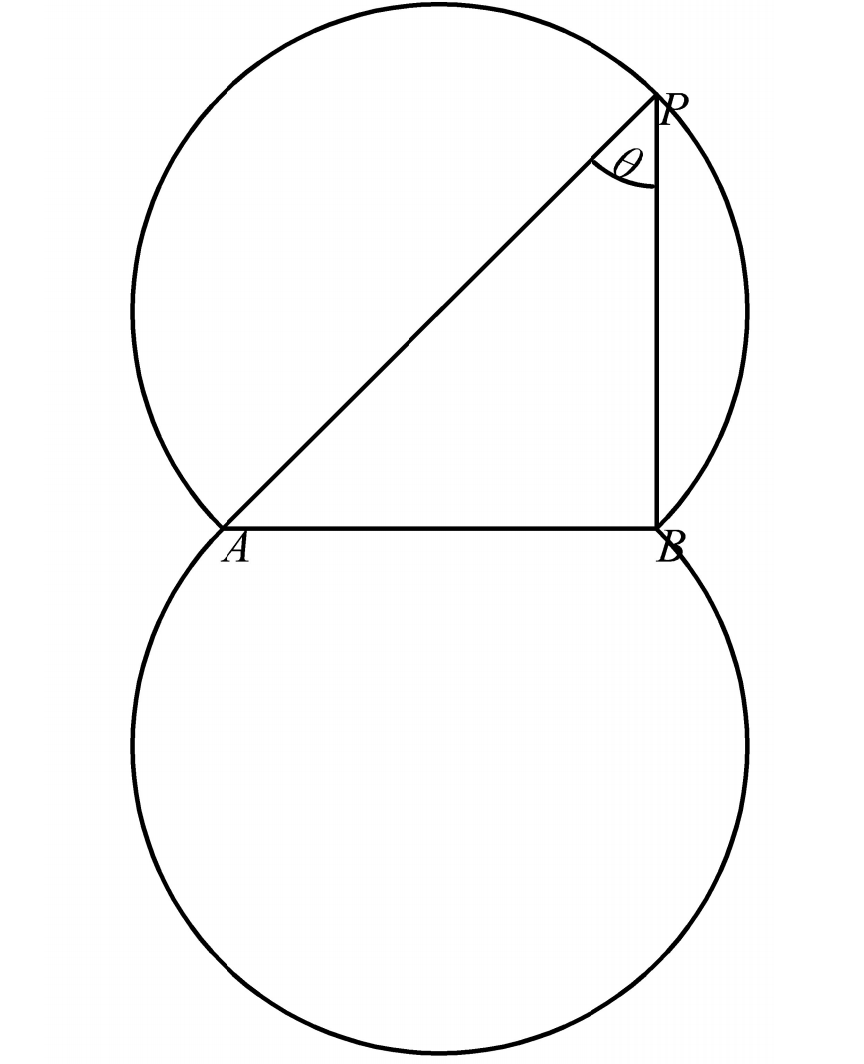 -->

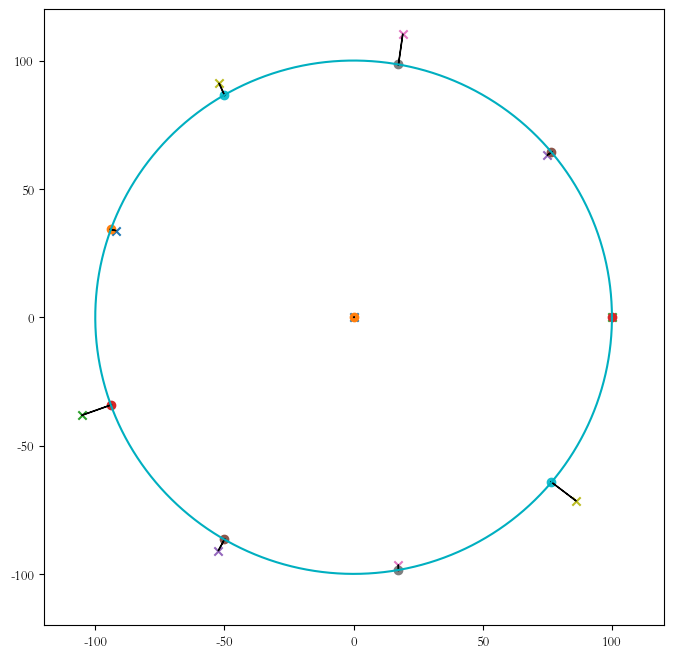

In [16]:
plt.figure(figsize=(8,8))
plt.xlim([-120,120])
plt.ylim([-120,120])

circle((0,0),100,"#00AFC0")

for i in range(0,10):
    plt.scatter(ps_xy[i][0],ps_xy[i][1],marker="x")
    plt.scatter(plane_series_xy[i][0],plane_series_xy[i][1],marker="o")
    plt.arrow(ps_xy[i][0],ps_xy[i][1],plane_series_xy[i][0]-ps_xy[i][0],plane_series_xy[i][1]-ps_xy[i][1],width=0.1)


In [ ]:
def move_by_line(p1,p2,p3,p,line,aim,step=0.01):
    k,b,vk,vb,alpha,x,y = line
    alphas = location((p1,p2,p3),p)
    diff = np.sum(np.abs(alphas[i] - aim[i]) for i in range(len(alphas)))

    if k == 0 or k == -0:
        p_now_p = (p[0]+step,p[1])
        p_now_n = (p[0]-step,p[1])
    elif k == np.inf or k == -np.inf:
        p_now_p = (p[0],p[1]+step)   
        p_now_n = (p[0],p[1]-step)   
    else:
        p_now_p = (p[0]+step*np.cos(alpha),p[1]+step*np.sin(alpha))
        p_now_n = (p[0]-step*np.cos(alpha),p[1]-step*np.sin(alpha))

    alphas_now_p = location((p1,p2,p3),p_now_p)
    alphas_now_n = location((p1,p2,p3),p_now_n)
    diff_now_p = np.sum(np.abs(alphas_now_n[i] - aim[i]) for i in range(len(alphas_now_n)))
    diff_now_n = np.sum(np.abs(alphas_now_n[i] - aim[i]) for i in range(len(alphas_now_n)))
    
    if (diff > diff_now_p and diff < diff_now_n) or (diff > diff_now_p and diff > diff_now_n and diff_now_p < diff_now_n):
        p_now = p_now_p
        alphas_now = alphas_now_p
        diff_now = diff_now_p
    elif diff < diff_now_p and diff > diff_now_n or  (diff > diff_now_p and diff > diff_now_n and diff_now_p > diff_now_n):
        p_now = p_now_n
        alphas_now = alphas_now_n
        diff_now_n
    else:
        p_now = p
        alphas_now = alphas
        diff_now = diff
    
    return p_now,alphas_now,diff_now
    
def move_by_circle(p1,p2,p3,p,radius,aim,step=0.01):
    pass

def auto_find(p1,p2,p3,p,aim):
    pass

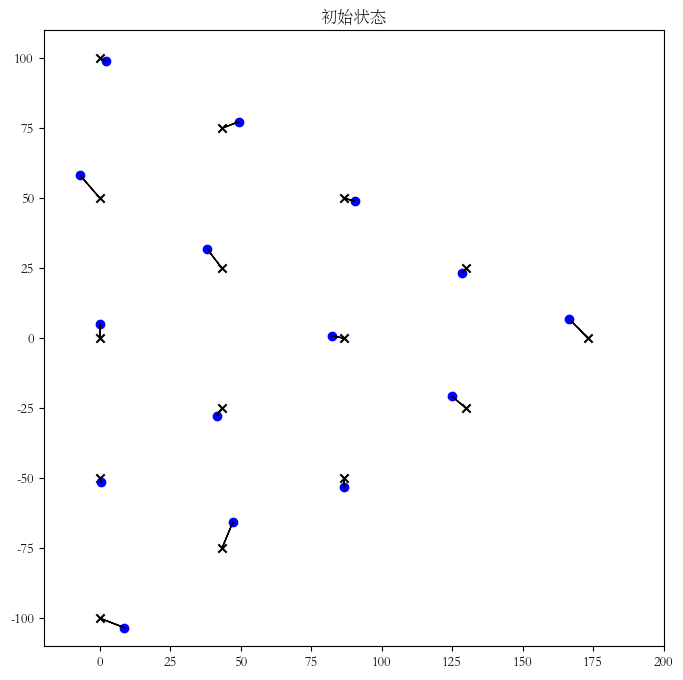

In [30]:
plt.figure(figsize=(8,8))
plt.xlim([-20,200])
plt.ylim([-110,110])

row = 5
length = 50

x_ps_1 = []
x_ps_2 = []

for i in range(row,0,-1):
    x_ps_1.append([((row-i)*length*np.sqrt(3)/2,y) for y in np.arange(-(i-1)*length/2,(i-1)*length/2+0.1,length)])
    x_ps_2.append([(x+rand()*10-rand()*10,y+rand()*10-rand()*10) for x,y in x_ps_1[len(x_ps_1)-1]])
    
for i in range(len(x_ps_1)):
    for j in range(len(x_ps_1[i])):
        
        plt.scatter(x_ps_1[i][j][0],x_ps_1[i][j][1],color="#000000",marker="x")
        plt.scatter(x_ps_2[i][j][0],x_ps_2[i][j][1],color="#0000FF",marker="o")
        plt.arrow(x_ps_1[i][j][0],x_ps_1[i][j][1],x_ps_2[i][j][0]-x_ps_1[i][j][0],x_ps_2[i][j][1]-x_ps_1[i][j][1])
plt.title("初始状态")
plt.show()

In [68]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# -------------------------------
# 输入参数
# -------------------------------
row = 5
length = 50

# -------------------------------
# 生成初始点 x_ps_1 和扰动后点 x_ps_2
# -------------------------------
np.random.seed(42)  # 可重复性

x_ps_1 = []
x_ps_2 = []

for i in range(row, 0, -1):
    # 初始：规则三角晶格（每行居中）
    y_coords = np.arange(-(i-1)*length/2, (i-1)*length/2 + 0.1, length)
    x_row = ((row - i) * length * np.sqrt(3) / 2)
    row_init = [(x_row, y) for y in y_coords]
    x_ps_2.append(row_init)
    
    # 终点：随机扰动 ±10
    row_final = [(x + np.random.rand()*10 - np.random.rand()*10,
                  y + np.random.rand()*10 - np.random.rand()*10)
                 for x, y in row_init]
    x_ps_1.append(row_final)

# -------------------------------
# 插值生成 20 帧的中间路径
# -------------------------------
num_frames = 20
t = np.linspace(0, 1, num_frames)  # 插值参数

# 展平所有点，便于处理
points_init = []
points_final = []
labels = []  # 标记每个点的行和列（用于区分）

idx = 0
for i, (row1, row2) in enumerate(zip(x_ps_1, x_ps_2)):
    for j, (p1, p2) in enumerate(zip(row1, row2)):
        points_init.append(p1)
        points_final.append(p2)
        labels.append(f"Row{i}_Point{j}")
        idx += 1

points_init = np.array(points_init)
points_final = np.array(points_final)
num_points = len(points_init)

# 插值得到每帧位置 (num_frames, num_points, 2)
positions = np.array([
    (1 - t[frm]) * points_init + t[frm] * points_final
    for frm in range(num_frames)
])

# -------------------------------
# 构建 DataFrame
# -------------------------------
data = []

# 添加动画帧（移动过程）
for frame in range(num_frames):
    for i in range(num_points):
        x, y = positions[frame, i]
        data.append({
            "frame": frame,
            "x": x,
            "y": y,
            "point_id": labels[i],
            "stage": "moving"
        })

# 添加初始状态（X 形状）—— 用 frame=-1 表示
for i in range(num_points):
    x, y = points_init[i]
    data.append({
        "frame": -1,
        "x": x,
        "y": y,
        "point_id": labels[i],
        "stage": "initial"
    })

# 添加终止状态（O 形状）—— 用 frame=max+1 表示
for i in range(num_points):
    x, y = points_final[i]
    data.append({
        "frame": num_frames,
        "x": x,
        "y": y,
        "point_id": labels[i],
        "stage": "final"
    })

df = pd.DataFrame(data)
# df = df.sort_values("frame")  # 确保动画顺序正确

# -------------------------------
# 创建动画
# -------------------------------
fig = px.scatter(
    df,
    x="x",
    y="y",
    animation_frame="frame",
    symbol="stage",
    symbol_map={
        "initial": "x",      # 初始点为 X
        "moving": "circle",  # 移动中为 O
        "final": "circle"    # 终点为 O
    },
    color="stage",
    color_discrete_map={
        "initial": "green",
        "moving": "blue",
        "final": "red"
    },
    hover_name="point_id",
    range_x=[df["x"].min() - 10, df["x"].max() + 10],
    range_y=[df["y"].min() - 10, df["y"].max() + 10],
    # title="三角晶格点阵移动动画（初始:X → 终点:O）",
    labels={"stage": "状态", "point_id": "点编号"}
)

# 调整点的大小
fig.update_traces(marker=dict(size=12))

# 添加轨迹线（可选：显示路径）
for i in range(num_points):
    trace_data = df[(df["point_id"] == labels[i]) & (df["stage"] == "moving")]
    fig.add_scatter(
        x=trace_data["x"],
        y=trace_data["y"],
        mode="lines",
        line=dict(color="lightgray", width=1),
        showlegend=False,
        hoverinfo="none"
    )

# 布局美化
fig.update_layout(
    xaxis_title="X",
    yaxis_title="Y",
    legend_title="状态",
    hovermode="closest",
    width=800,
    height=700
)

# 设置动画速度
if fig.layout.updatemenus:
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500  # 每帧500ms
    fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 100

fig.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

# 假设 r2xy 函数已定义
def r2xy(r, theta):
    return r * np.cos(theta), r * np.sin(theta)

# 参数
radius = 100
np.random.seed(42)

# 生成数据
plane_series = np.array([
    (np.float64(0), np.float64(0)),
    *[(radius, x) for x in np.arange(0, 2*np.pi, 40*2*np.pi/360)]
])
plane_series_xy = [r2xy(*p) for p in plane_series]


plane_positions_truth = [
    (0, 0), (100, 0),
    *[(i[0] + np.random.rand()*20 - 0.5, i[1] + np.random.rand()*20 - 0.5) for i in plane_series_xy[2:]]
]

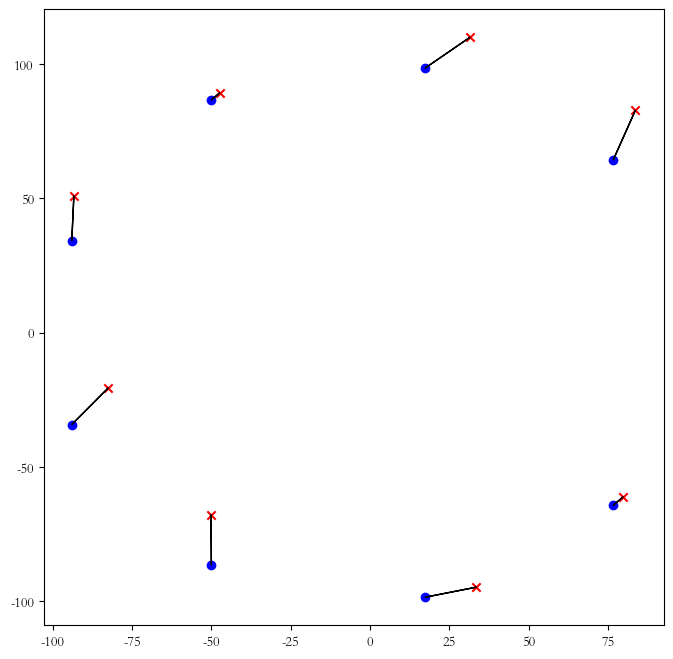

In [66]:
plt.figure(figsize=(8,8))
for i in range(8):
    plt.scatter(plane_series_xy[2:][i][0],plane_series_xy[2:][i][1],marker='o',color="blue")
    plt.scatter(plane_positions_truth[2:][i][0],plane_positions_truth[2:][i][1],marker='x',color="red")
    plt.arrow(plane_positions_truth[2:][i][0],plane_positions_truth[2:][i][1],plane_series_xy[2:][i][0]-plane_positions_truth[2:][i][0],plane_series_xy[2:][i][1]-plane_positions_truth[2:][i][1])

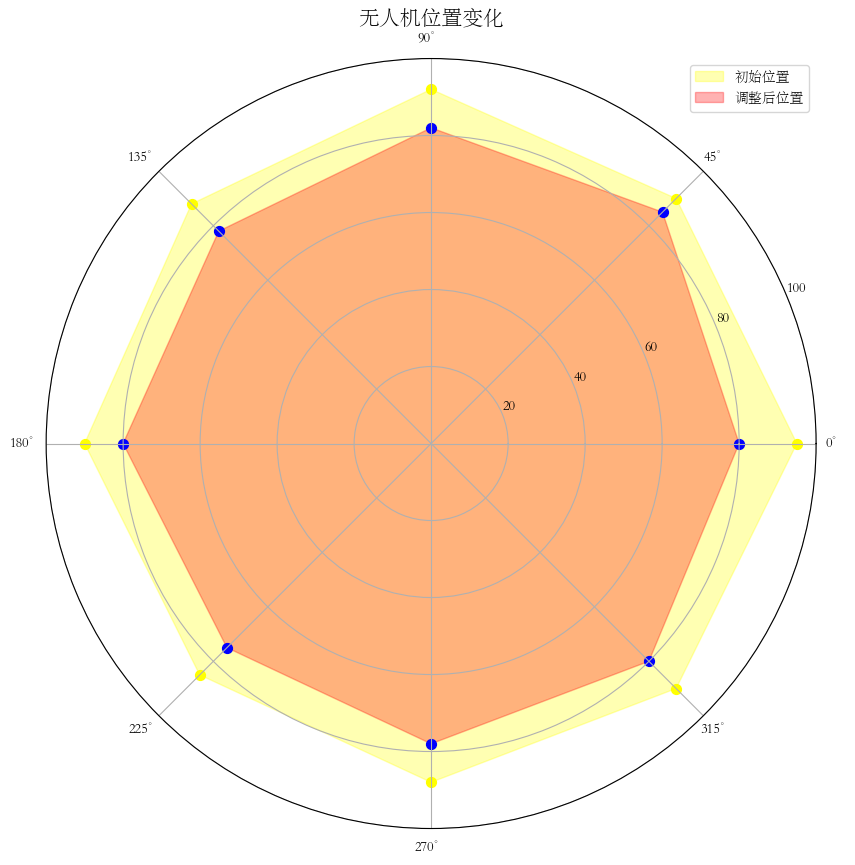

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 生成模拟数据：初始位置（角度、半径）和调整后位置（角度、半径）
# 角度单位为度，需转换为弧度用于计算
angles_initial = np.array([0, 45, 90, 135, 180, 225, 270, 315])
radii_initial = np.array([95, 90, 92, 88, 90, 85, 88, 90])

angles_adjusted = np.array([0, 45, 90, 135, 180, 225, 270, 315])
radii_adjusted = np.array([80, 85, 82, 78, 80, 75, 78, 80])

# 将角度转换为弧度
theta_initial = np.radians(angles_initial)
theta_adjusted = np.radians(angles_adjusted)

# 创建极坐标图
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

# 绘制初始位置（用黄色填充的多边形）
ax.fill(theta_initial, radii_initial, color='#FFFF000F', alpha=0.3, label='初始位置')

# 绘制调整后位置（用蓝色填充的多边形）
ax.fill(theta_adjusted, radii_adjusted, color='#FF00000F', alpha=0.3, label='调整后位置')

# 绘制初始位置的散点
ax.scatter(theta_initial, radii_initial, color='yellow', s=50, marker='o')

# 绘制调整后位置的散点
ax.scatter(theta_adjusted, radii_adjusted, color='blue', s=50, marker='o')

# 设置极坐标的刻度和标签
ax.set_rmax(100)  # 极径最大值
ax.set_rticks(np.arange(20, 101, 20))  # 极径刻度
ax.set_thetagrids(np.arange(0, 360, 45))  # 极角刻度，每45度一个刻度

# 添加标题和图例
ax.set_title('无人机位置变化', fontsize=15)
ax.legend(loc='upper right')

# 显示图形
plt.show()

In [67]:

# 我们取索引 3 到 10（即第4个到第11个点），但注意边界
start_points = plane_positions_truth[3:11]   # 索引 3~10（含头不含尾）→ 8 个点
end_points = plane_series_xy[3:11]           # 同样取 8 个点

assert len(start_points) == len(end_points), "起点和终点数量必须一致"

# 插值生成 20 帧
num_frames = 20
t = np.linspace(0, 1, num_frames)

positions = np.array([
    (1 - t[frm]) * np.array(start_points) + t[frm] * np.array(end_points)
    for frm in range(num_frames)
])

# 构建主数据 DataFrame
data = []
for frame in range(num_frames):
    for point_id, (x, y) in enumerate(positions[frame]):
        data.append({
            "frame": frame,
            "x": x,
            "y": y,
            "point_id": point_id,
            "stage": "moving"
        })

df = pd.DataFrame(data)

# -------------------------------
# ✅ 使用 pd.concat() 添加初始和终止状态
# -------------------------------

# 创建初始状态数据
initial_data = []
for point_id, (x, y) in enumerate(start_points):
    initial_data.append({
        "frame": -1,
        "x": x,
        "y": y,
        "point_id": point_id,
        "stage": "initial"
    })

# 创建终止状态数据
final_data = []
for point_id, (x, y) in enumerate(end_points):
    final_data.append({
        "frame": num_frames,
        "x": x,
        "y": y,
        "point_id": point_id,
        "stage": "final"
    })

# 转为 DataFrame
df_initial = pd.DataFrame(initial_data)
df_final = pd.DataFrame(final_data)

# 使用 pd.concat 拼接
df = pd.concat([df, df_initial, df_final], ignore_index=True)

# 排序 frame，确保动画顺序
# df = df.sort_values("frame").reset_index(drop=True)

# -------------------------------
# 绘制动画
# -------------------------------
fig = px.scatter(
    df,
    x="x",
    y="y",
    animation_frame="frame",
    symbol="stage",
    symbol_map={"initial": "x", "moving": "circle", "final": "circle"},
    color="stage",
    color_discrete_map={"initial": "green", "moving": "blue", "final": "red"},
    hover_name="point_id",
    range_x=[df["x"].min() - 10, df["x"].max() + 10],
    range_y=[df["y"].min() - 10, df["y"].max() + 10],
    # title="点3-点10移动动画（初始:X → 终点:O）"
)

fig.update_traces(marker=dict(size=12))
fig.update_layout(width=800, height=800)

# 设置动画速度（可选）
if fig.layout.updatemenus:
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 200
    fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 50

fig.show()